## Visualizing earthquakes

Let's use Plotly to make an exploratory analysis of a dataset that gathers data from various incidents around the world, and in particular lots of earthquakes that have occured since 1965 !

The dataset is available on Kaggle, you can download it and you'll find a description here :  https://www.kaggle.com/usgs/earthquake-database

## Beginning with the dataset

1. Import pandas and the different packages of Plotly

In [3]:
import pandas as pd
import plotly.express as px
import chardet

#on affiche toutes les colonnes
pd.set_option('display.max_columns', None)

#on specifie le fichier a charger
fichier="earthquakes.csv"

#on gère les problemes de chargement simplement: check encoding avec la librairie chardet

try:
    df = pd.read_csv(fichier)
    print(f"Fichier '{fichier}' chargé OK")
except:
    raise ValueError(f"probleme lors du chargement du fichier {fichier} , avez vous spécifié le bon encodage? ")



Fichier 'earthquakes.csv' chargé OK


check des datas, des valeurs manquantes, des valeurs suspectes, des doublons, etc.

In [19]:
from data_audit.utils import rapport_data_complet as audit
audit(df)

ImportError: cannot import name 'rapport_data_complet' from 'data_audit.utils' (c:\Projects\formation\jedha\dsfs-ft-40\profs\EDA\data_audit\utils.py)

2. Read the file and show the first rows as well as basic statistics about the dataset

In [9]:
#on regarde la forme du df
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  Magnitude Error  \
0                     NaN        6.0             MW              NaN   
1                     NaN        5.8             MW              NaN   
2                     NaN        6.2             MW              NaN   
3                     NaN        5.8             MW              NaN   
4                     NaN        5.8             MW              NaN   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic

In [10]:
df.describe()

Latitude     Longitude         Depth  Depth Error  \
count  23409.000000  23409.000000  23409.000000  4460.000000   
mean       1.678763     39.636726     70.748526     4.991118   
std       30.113379    125.514881    122.605748     4.873905   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.652000    -76.352000     14.530000     1.800000   
50%       -3.569000    103.981000     33.000000     3.500000   
75%       26.188000    145.027000     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7096.000000  23409.000000       327.000000   
mean               275.362176      5.882558         0.071820   
std                162.152976      0.423084         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.700000         0.059000   
75%                384.000000      6.000000         0.075500   
max                934.000000      9.100000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                 2564.000000    7298.000000          1604.000000   
mean                    48.944618      44.165158             3.992660   
std                     62.943106      32.143388             5.377262   
min                      0.000000       0.000000             0.004505   
25%                     10.000000      24.100000             0.968750   
50%                     28.000000      36.000000             2.319500   
75%                     66.000000      54.000000             4.724500   
max                    821.000000     360.000000            37.874000   

       Horizontal Error  Root Mean Square  
count       1156.000000      17350.000000  
mean           7.662759          1.022766  
std           10.430396          0.188544  
min            0.085000          0.000000  
25%            5.300000          0.900000  
50%            6.700000          1.000000  
75%            8.100000          1.130000  
max           99.000000          3.440000

3. In the following, we will use a lot the `Date` column. To avoid problems with your visualizations, use pandas to convert this column into `Datetime` type :

In [25]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
print(df["Date"].dtype)
df.head()

datetime64[ns]


Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0 1965-01-02  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1 1965-01-04  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2 1965-01-05  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3 1965-01-08  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4 1965-01-09  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  Magnitude Error  \
0                     NaN        6.0             MW              NaN   
1                     NaN        5.8             MW              NaN   
2                     NaN        6.2             MW              NaN   
3                     NaN        5.8             MW              NaN   
4                     NaN        5.8             MW              NaN   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic

## Exploring the number of observations over time

4. Make a simple plot with plotly express to display the number of observed events as a function of time

In [28]:
px.histogram(df, x ="Date",width=700, height=500)

If the `Date` column was converted into `Datetime`, plotly handles it and has automatically set the number of bins such that the counts are made by year. This makes the histogram easily readable.

In the following, you will create customized plots with plotly.graph_objects to display more accurate information about the number of events.

5. With plotly.graph_objects, create a histogram with a range slider such that you can visualize the daily number of events

In [55]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(x=df["Date"], nbinsx=1000))
fig.update_layout(title=go.layout.Title(text='Number of observations per day', x=0.5))
fig.update_layout(xaxis_title='X')
fig.update_layout(width=700, height=500)
# Create and add slider
fig.update_xaxes(rangeslider_visible=True, type="date")

fig.show()

6. We would like to check if there's some seasonality in the number of events. Create new columns in the dataset with the id of the month and year. Then use plotly's `make_subplots` function to display the monthly number of observations over a given year, independently for each of the five last years (so, there will be 5 independent histograms)

In [130]:
df_copy = df.copy()
df_copy["month_id"] = df_copy["Date"].dt.month
df_copy["year_id"] = df_copy["Date"].dt.year
df_copy.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0 1965-01-02  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1 1965-01-04  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2 1965-01-05  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3 1965-01-08  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4 1965-01-09  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  Magnitude Error  \
0                     NaN        6.0             MW              NaN   
1                     NaN        5.8             MW              NaN   
2                     NaN        6.2             MW              NaN   
3                     NaN        5.8             MW              NaN   
4                     NaN        5.8             MW              NaN   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  month_id  year_id  
0           ISCGEM  Automatic         1     1965  
1           ISCGEM  Automatic         1     1965  
2           ISCGEM  Automatic         1     1965  
3           ISCGEM  Automatic         1     1965  
4           ISCGEM  Automatic         1     1965

In [169]:
from plotly.subplots import make_subplots

#obtenir la derniere année du df et la première année du df
print(df_copy["year_id"].max())
print(df_copy["year_id"].min())
print(df_copy["year_id"].dtype)
#on ne garde que les 5 dernières années du df 
df_five_last_years = df_copy[df_copy["year_id"] >= df_copy["year_id"].max() - 4]
print(df_five_last_years["year_id"].unique())

fig = make_subplots(rows=6,cols=1)
j=1
#on va boucler sur les 5 dernières années du df et faire un histogramme pour chaque année
#On calcule le range d'années à partir du df_five_last_years
max_year=df_five_last_years["year_id"].max()
min_year=df_five_last_years["year_id"].min()

for i in range(min_year, max_year+1):
    df_year = df_five_last_years[df_five_last_years["year_id"] == int(i)]

    #on vérifie que le df_year n'est pas vide avant de faire l'histogramme
    if df_year.empty:
        print(f"→ Aucune donnée pour l'année {year} (ligne ignorée)")
        continue
    #on se sert d'une figure temporaire qui sera ecrasée après avoir étée utilisée pour ajouter la trace à la figure finale
    fig_tmp=go.Figure()
    fig_tmp.add_trace(go.Histogram(x=df_year["Date"], nbinsx=50,name= str(i), showlegend = True))
    fig_tmp.update_layout(title=go.layout.Title(text=f'Number of observations per day for the year {i}', x=0.5))
    fig_tmp.update_layout(xaxis_title='X')
    fig_tmp.update_layout(width=700, height=500)
    fig.add_trace(fig_tmp['data'][0], row=j, col=1)
    #on incrémente le compteur de row utilisé dans le subplot pour la figure finale()
    j+=1

#on finalise le layout global fig
fig.update_layout(height=1500, showlegend=True, title_text="Number of observations per day for the last 5 years")

fig.show()

2016
1965
int32
[2012 2013 2014 2015 2016]


7. Now, we would like to allow the user to choose a specific year among the five last years, and display the daily number of observations fot this year only. Use the `Updatemenu` and `Button` classes together with `add_trace` to create an interactive visualization.

In [167]:
from plotly.subplots import make_subplots

#obtenir la derniere année du df et la première année du df
print(df_copy["year_id"].max())
print(df_copy["year_id"].min())
print(df_copy["year_id"].dtype)
#on ne garde que les 5 dernières années du df 
df_five_last_years = df_copy[df_copy["year_id"] >= df_copy["year_id"].max() - 4]
print(df_five_last_years["year_id"].unique())

#on va boucler sur les 5 dernières années du df et faire un histogramme pour chaque année
#On calcule le range d'années à partir du df_five_last_years
max_year=df_five_last_years["year_id"].max()
min_year=df_five_last_years["year_id"].min()
print(f"min_year: {min_year}, max_year: {max_year}")
fig=go.Figure()
for i in range(min_year, max_year+1):
    df_year = df_five_last_years[df_five_last_years["year_id"] == int(i)]

    #on vérifie que le df_year n'est pas vide avant de faire l'histogramme
    if df_year.empty:
        print(f"→ Aucune donnée pour l'année {year} (ligne ignorée)")
        continue
    #on se sert d'une figure temporaire qui sera ecrasée après avoir étée utilisée pour ajouter la trace à la figure finale
    fig_tmp=go.Figure()
    fig_tmp.add_trace(go.Histogram(x=df_year["Date"], nbinsx=50,name= str(i), showlegend = True))
    fig_tmp.update_layout(title=go.layout.Title(text=f'Number of observations per day for the year {i}', x=0.5))
    fig_tmp.update_layout(xaxis_title='X')
    fig_tmp.update_layout(width=700, height=500)
    fig.add_trace(fig_tmp['data'][0])

#on finalise le layout global fig
fig.update_layout(height=700, showlegend=True, title_text="Number of observations per day for the last 5 years")

#nous allons ajouter des boutons pour n'afficher que l'année sélectionnée et masquer les autres années

#on crée une liste de boutons pour chaque année
buttons = []
#on ajoute un bouton pour afficher toutes les années
buttons.append(dict(label="All", method="update", args=[{"visible": [True] * len(fig['data'])}, {"title": "Number of observations per day for the last 5 years"}]))

#on ajoute un bouton pour chaque année
nb_subplot=(len(fig['data']))
for i in range(nb_subplot):
    visible = [False] * nb_subplot
    visible[i] = True
    buttons.append(dict(label=f"Year {min_year + i}", method="update", args=[{"visible": visible}, {"title": f"Number of observations per day for the year {min_year + i}"}]))
#chaque bouton a été créé nous allons maintenant les ajouter à la figure
fig.update_layout(updatemenus=[dict(active=0, buttons=buttons, x=1.1, y=1.15)])



fig.show()

2016
1965
int32
[2012 2013 2014 2015 2016]
min_year: 2012, max_year: 2016


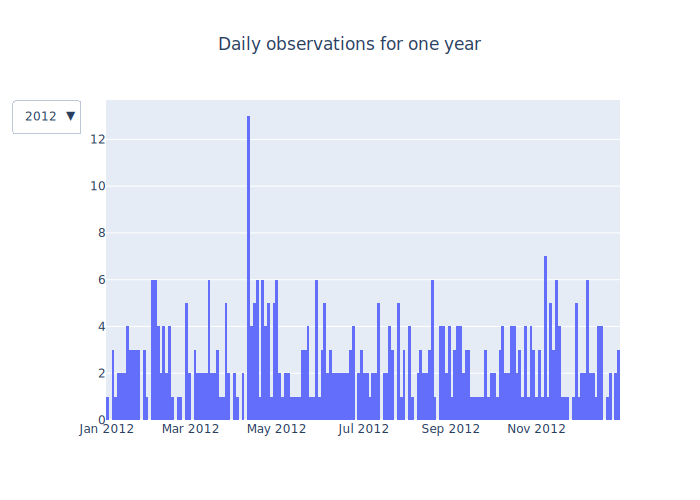

## Focusing on earthquakes

8. Use plotly express to display the proportions of each type of events in the dataset

In [177]:
px.pie(df, names="Type", title="Distribution of type of events")

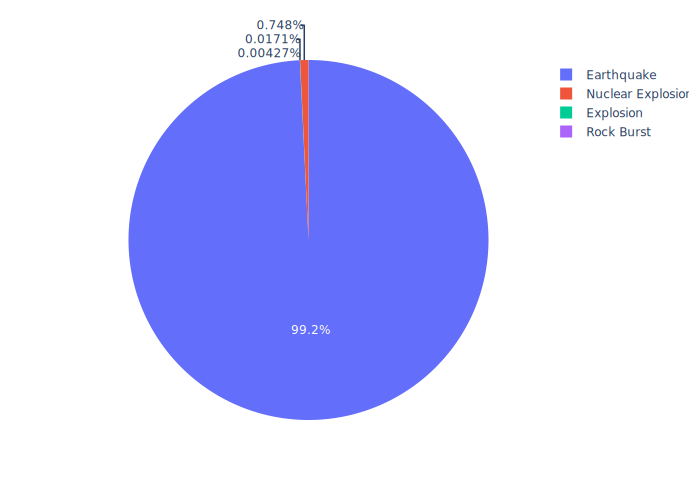

From now, we will focus only on earthquakes.

9. Create a new dataset containing only earthquakes and plot the distribution of their magnitudes depths

In [182]:
earthquakes=df_copy[df_copy["Type"] == "Earthquake"]
fig=go.Figure(
            data=[go.Histogram(x=earthquakes["Magnitude"], nbinsx=50)], 
            layout=go.Layout(title="Distribution of earthquake magnitudes", xaxis_title="Magnitude", yaxis_title="Count", width=700, height=500)
            )
fig.show()

In [183]:
earthquakes=df_copy[df_copy["Type"] == "Earthquake"]
earthquakes.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0 1965-01-02  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1 1965-01-04  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2 1965-01-05  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3 1965-01-08  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4 1965-01-09  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  Magnitude Error  \
0                     NaN        6.0             MW              NaN   
1                     NaN        5.8             MW              NaN   
2                     NaN        6.2             MW              NaN   
3                     NaN        5.8             MW              NaN   
4                     NaN        5.8             MW              NaN   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  month_id  year_id  
0           ISCGEM  Automatic         1     1965  
1           ISCGEM  Automatic         1     1965  
2           ISCGEM  Automatic         1     1965  
3           ISCGEM  Automatic         1     1965  
4           ISCGEM  Automatic         1     1965

In [185]:
earthquakes=df_copy[df_copy["Type"] == "Earthquake"]
fig=go.Figure(
            data=[go.Histogram(x=earthquakes["Depth"])], 
            layout=go.Layout(title="Distribution of earthquake depths", xaxis_title="Depth", yaxis_title="Count", width=700, height=500)
            )
fig.show()

10. Now, we'd like to explore the evolution of the magnitudes as a function of time :


- Create a dataframe containing the mean magnitudes per day
- Then use this dataset to display the mean magnitudes per day, with a range slider allowing the user to navigate among the dates
- Add a reference line showing the value of the mean magnitude computed over the whole dataset


In [195]:
mean_magnitude_day= df_copy.groupby(df_copy["Date"].dt.date)["Magnitude"].mean().reset_index(name="mean_magnitude")
mean_magnitude_day.head()

Date  mean_magnitude
0  1965-01-02             6.0
1  1965-01-04             5.8
2  1965-01-05             6.2
3  1965-01-08             5.8
4  1965-01-09             5.8

In [ ]:
#creation de figure vide
fig = go.Figure()
#Ajout de l'histogramme du nombre d'observations par jour
fig.add_trace(go.Scatter(x=mean_magnitude_day["Date"], y=mean_magnitude_day["mean_magnitude"]))
#ajout de la ligne pour le seuil de la moyenne de magnitude
fig.add_hline(
    y=mean_magnitude_day["mean_magnitude"].mean(),
    line_color="red",
    line_width=2,
    line_dash="dash"
)
fig.update_layout(title=go.layout.Title(text='Number of observations per day', x=0.5))
fig.update_layout(xaxis_title='X')
fig.update_layout(width=700, height=500)
# Create and add slider
fig.update_xaxes(rangeslider_visible=True, type="date")

fig.show()

: 

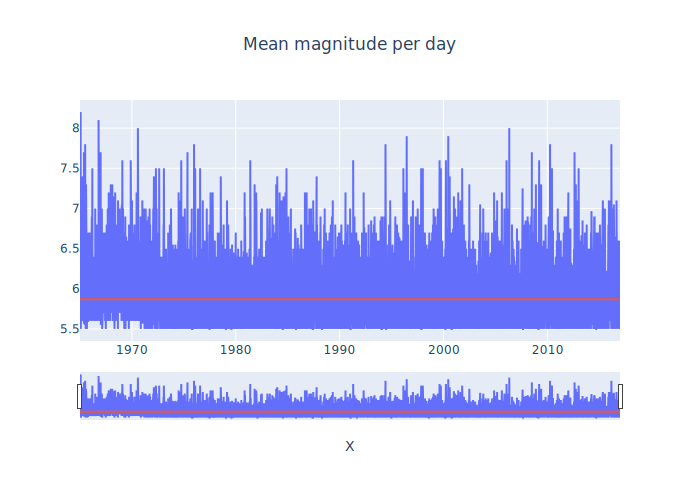

To finish, let's visualize the distribution of the earthquakes around the world.

11. Use plotly express' `scatter_mapbox` to display the earthquakes on a map. Change the color of the markers depending on the value of the magnitude. Use the documentation and [this page](https://plotly.com/python/builtin-colorscales/) to find a suitable colorscale.

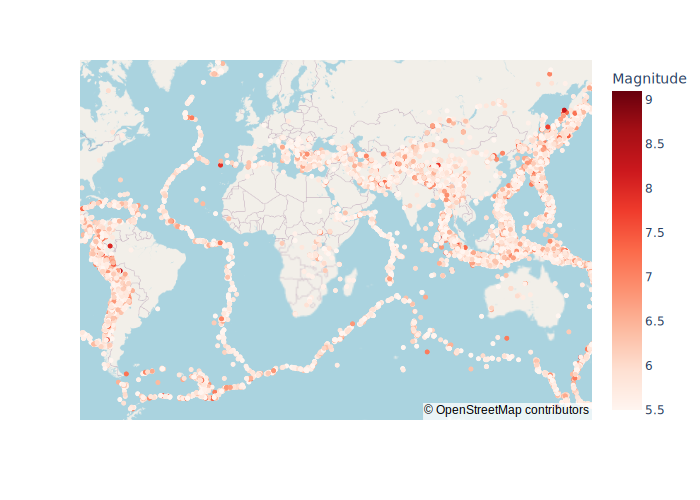

12. Let's make the map animated ! Add some arguments in `scatter_mapbox` to create an animation displaying the earthquakes year by year

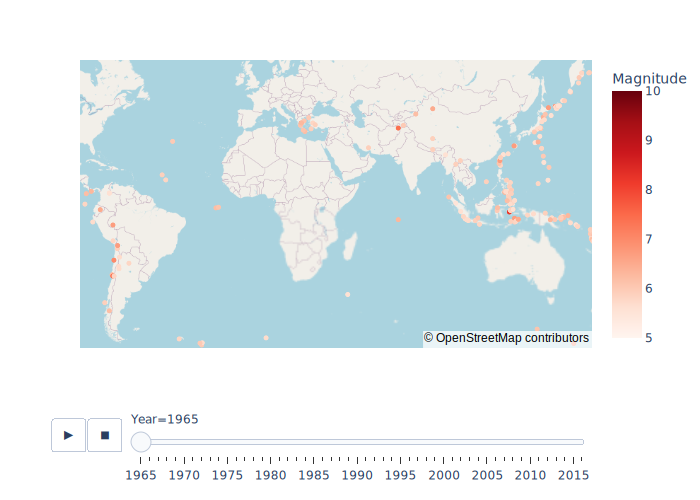

13. **Optional** Look for another function in plotly express that allows to display on a map the *density of earthquakes* (instead of each earthquake separately), and make it animated to display the evolution year by year.

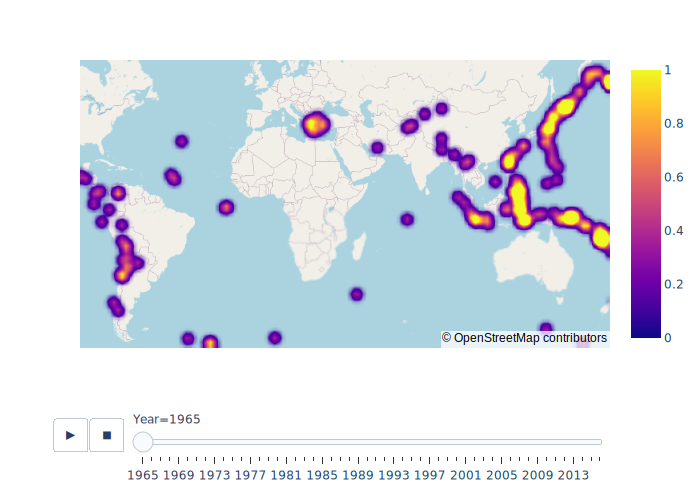